In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pwd = os.getcwd()
os.chdir('/Users/slill/Code/EXP/build/pyEXP/')
import pyEXP
os.chdir(pwd)

import copy
import yaml

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from os.path import exists



import seaborn as sns   

plt.style.use('my_latex_standard2')

%load_ext wurlitzer

In [2]:
datadir = '/Users/slill/Documents/Projects/exp-extreme-MWLMC/data/extreme-mwlmc'


In [3]:
# config each component
runtag='RunG5'

## haloes
### MW halo
print("config MW halo")
mwhconfig = """
---
id: sphereSL
parameters :
  numr     : 2000
  rmin     : 0.00001
  rmax     : 2.0
  Lmax     : 6
  nmax     : 20
  rmapping : 0.0667
  modelname : Einasto_rs0.07_rhos24.913_alpha0.16_rtrunc20.txt
  cachename : EinastoR20
"""

mwhruntag = f'mwhalo.{runtag}'
mwhbasis = pyEXP.basis.Basis.factory(mwhconfig)
mwhcoefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.{mwhruntag}')

### LMC halo
print("config LMC halo")
lmchconfig = """
---
id: sphereSL
parameters :
  numr     : 2000
  rmin     : 0.00001
  rmax     : 2.0
  Lmax     : 6
  nmax     : 20
  rmapping : 0.0667
  modelname : Einasto_rs0.035_rhos24.682_alpha0.16_rtrunc33.txt
  cachename : EinastoR33
"""

lmchruntag = f'lmchalo.{runtag}'
lmchbasis = pyEXP.basis.Basis.factory(lmchconfig)
lmchcoefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.{lmchruntag}')

## discs
### MW disc
print("config MW Disc")
mwdconfig=f"""
id         : cylinder
parameters :
    acyl       : 0.029
    hcyl       : 0.004
    lmaxfid    : 72
    mmax       : 6
    nmaxfid    : 32
    nmax       : 20
    ncylodd    : 8
    ncylnx     : 512
    ncylny     : 256
    rcylmin    : 0.001
    rcylmax    : 100.0
    rnum       : 200 
    pnum       : 1 
    tnum       : 80 
    vflag      : 16 
    logr       : true 
    self_consistent: true
    eof_file   : {datadir}/MWeofhires
# """

mwdruntag = f'mwdisk.{runtag}'
mwdbasis = pyEXP.basis.Basis.factory(mwdconfig)
mwdcoefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.{mwdruntag}')

### LMC disc
print("config LMC Disc")
lmcdconfig=f"""
id         : cylinder
parameters :
    acyl       : 0.014
    hcyl       : 0.003
    lmaxfid    : 72
    mmax       : 6
    nmaxfid    : 32
    nmax       : 20
    ncylodd    : 8
    ncylnx     : 512
    ncylny     : 256
    rcylmin    : 0.001
    rcylmax    : 200.0
    rnum       : 200 
    pnum       : 1 
    tnum       : 80 
    vflag      : 16 
    logr       : true 
    self_consistent : true
    eof_file   : {datadir}/LMCeofhires
"""
#   #cachename  : {datadir}/LMCeofcache

lmcdruntag = f'lmcdisk.{runtag}'
lmcdbasis = pyEXP.basis.Basis.factory(lmcdconfig)
lmcdcoefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.{lmcdruntag}')

config MW halo
config LMC halo
config MW Disc
config LMC Disc


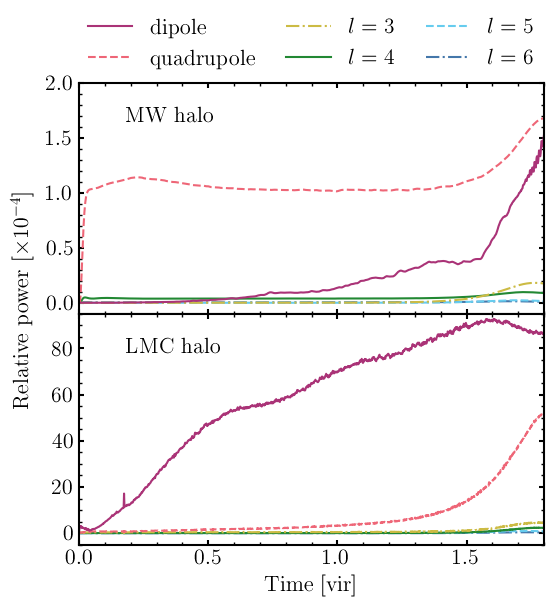

In [46]:
colors =  ['#4477AA', # blue 
            '#66CCEE', # cyan  
            '#228833', # green 
            '#CCBB44', # yellow 
            '#EE6677', # red 
            '#AA3377'][::-1] # purple
#             '#BBBBBB', # grey 
#             '#000000'][::-1] # black 

linstyles = ['-', '--', '-.', '-', '--', '-.']

fig, ax = plt.subplots(2,1, figsize=(6, 6), sharex=True, gridspec_kw={'hspace': 0.0})

mwhpower = mwhcoefs.Power()
lmchpower = lmchcoefs.Power()
for i in range(1, mwhpower.shape[1])[::-1]:
    ax[0].plot(mwhcoefs.Times(), mwhpower[:,i]/mwhpower[:,0]*1e4, label='{}'.format(i), c=colors[i-1], ls=linstyles[i-1])
    ax[1].plot(lmchcoefs.Times(), lmchpower[:,i]/lmchpower[:,0]*1e4, c=colors[i-1], ls=linstyles[i-1])
    
handles, labels = ax[0].get_legend_handles_labels()
labels = ['dipole', 'quadrupole', r'$l=3$', r'$l=4$', r'$l=5$', r'$l=6$']
leg = ax[0].legend(handles[::-1], labels, 
                bbox_to_anchor=(0.0, 1.02, 1., .102), 
                     loc=3, ncol=3, 
                mode="expand", borderaxespad=0., 
                frameon=False, fontsize=16)

ax[1].set_xlabel('Time [vir]')
ax[0].set_xlim(0, 1.8)
ax[0].set_ylim(-0.1, 2)
ax[1].set_ylim(-5, 95)

ax[1].text(0.1, 0.85, 'LMC halo', horizontalalignment='left',
    verticalalignment='center', transform=ax[1].transAxes)
ax[0].text(0.1, 0.85, 'MW halo', horizontalalignment='left',
    verticalalignment='center', transform=ax[0].transAxes)

fig.text(0.01, 0.52, r'Relative power [$\times 10^{-4}$]', va='center', rotation='vertical', fontsize = 16)


fig.savefig(f'plots/{runtag}_halopower.pdf', bbox_inches='tight')
fig.savefig(f'plots/{runtag}_halopower.png', bbox_inches='tight')
plt.show()



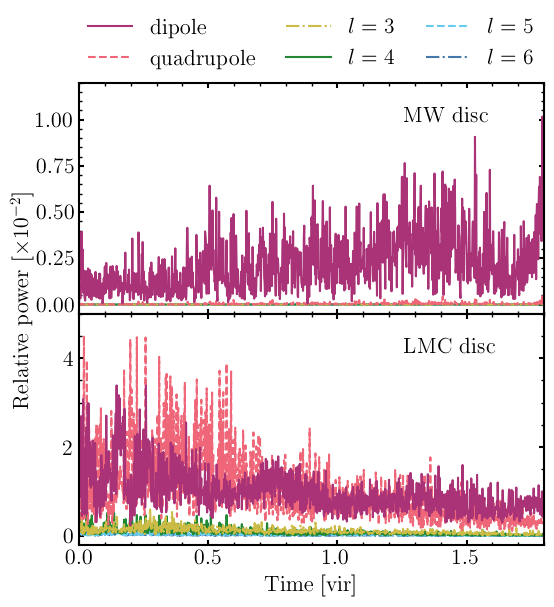

In [48]:
colors =  ['#4477AA', # blue 
            '#66CCEE', # cyan  
            '#228833', # green 
            '#CCBB44', # yellow 
            '#EE6677', # red 
            '#AA3377'][::-1] # purple
#             '#BBBBBB', # grey 
#             '#000000'][::-1] # black 

linstyles = ['-', '--', '-.', '-', '--', '-.']

fig, ax = plt.subplots(2,1, figsize=(6, 6), sharex=True, gridspec_kw={'hspace': 0.0})

mwdpower = mwdcoefs.Power()
lmcdpower = lmcdcoefs.Power()
for i in range(1, mwdpower.shape[1])[::-1]:
    ax[0].plot(mwdcoefs.Times(), mwdpower[:,i]/mwdpower[:,0]*1e2, label='{}'.format(i), c=colors[i-1], ls=linstyles[i-1])
    ax[1].plot(lmcdcoefs.Times(), lmcdpower[:,i]/lmcdpower[:,0]*1e2, c=colors[i-1], ls=linstyles[i-1])
    
handles, labels = ax[0].get_legend_handles_labels()
labels = ['dipole', 'quadrupole', r'$l=3$', r'$l=4$', r'$l=5$', r'$l=6$']
leg = ax[0].legend(handles[::-1], labels, 
                bbox_to_anchor=(0.0, 1.02, 1., .102), 
                     loc=3, ncol=3, 
                mode="expand", borderaxespad=0., 
                frameon=False, fontsize=16)

ax[1].set_xlabel('Time [vir]')

ax[0].set_xlim(0, 1.8)

ax[0].set_ylim(-0.05, 1.2)
ax[1].set_ylim(-0.2, 5)

ax[1].text(0.7, 0.85, 'LMC disc', horizontalalignment='left',
    verticalalignment='center', transform=ax[1].transAxes)
ax[0].text(0.7, 0.85, 'MW disc', horizontalalignment='left',
    verticalalignment='center', transform=ax[0].transAxes)

fig.text(0.01, 0.52, r'Relative power [$\times 10^{-2}$]', va='center', rotation='vertical', fontsize = 16)


fig.savefig(f'plots/{runtag}_discpower.pdf', bbox_inches='tight')
fig.savefig(f'plots/{runtag}_discpower.png', bbox_inches='tight')
plt.show()

